In [ ]:
%%capture
! pip3 install "plotnine"
! pip3 install xlrd
! pip3 install prophet

In [39]:
from pandas import read_csv, DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns

Text(0.5, 1.0, 'Population Growth- India (1950-2020)')

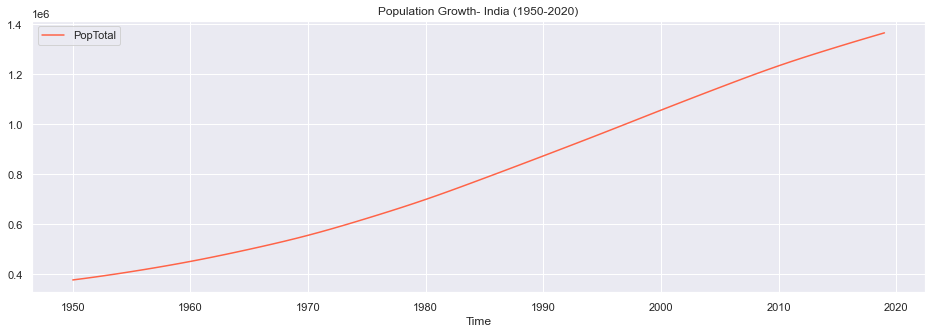

In [675]:
df= read_csv('../Data/world_population.csv')
df.head(10)
india= df[df['Location']== 'India'][['Time', 'PopTotal']].set_index('Time')
india= india.iloc[:70]
india.plot.line(figsize= (16, 5), color= "tomato")
plt.title('Population Growth- India (1950-2020)')

In [ ]:
# Examples of decreasing and constat trends from energy data of UK and Qatar respectively

Text(0.5, 1.0, 'Air Temperature Variation- Barcelona, Spain (1950-2020)')

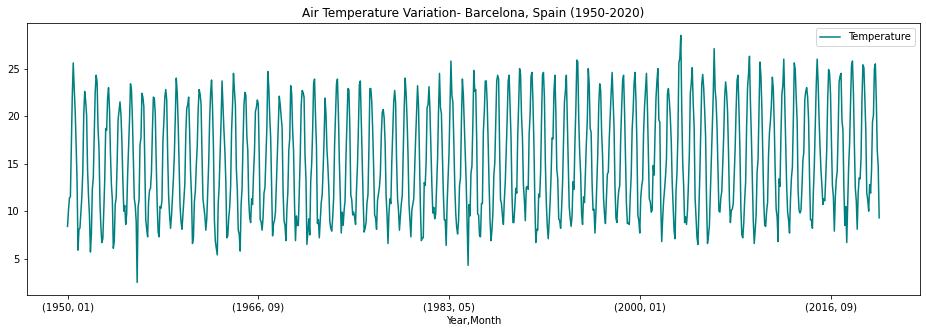

In [43]:
barcelona= read_csv('../Data/monthly_temperatures_barcelona.csv')
barcelona.columns= ["Year", "January", "February", "March", "April", "May",
             "June", "July", "August", "September", "October", "November", "December"]
values= []
time_index= []
month= ["01", "02", "03", "04",
        "05", "06", "07", "08", "09", 
        "10", "11", "12"]
for item, row in DataFrame(barcelona.to_numpy()).iterrows():
    values.extend(row[1:].values)
    time_index.extend([int(row[0])]*12)

barcelona= DataFrame(
    {'Year': time_index,
     'Month': month*241,
     'Temperature': values}).set_index(["Year", "Month"])

barcelona[2040:].plot.line(figsize= (16, 5), color= "teal")
plt.title('Air Temperature Variation- Barcelona, Spain (1950-2020)')

Text(0.5, 1.0, 'Total Air Passengers Travelled- Schipol Airport, Amsterdam, Netherlands (1999-2019)')

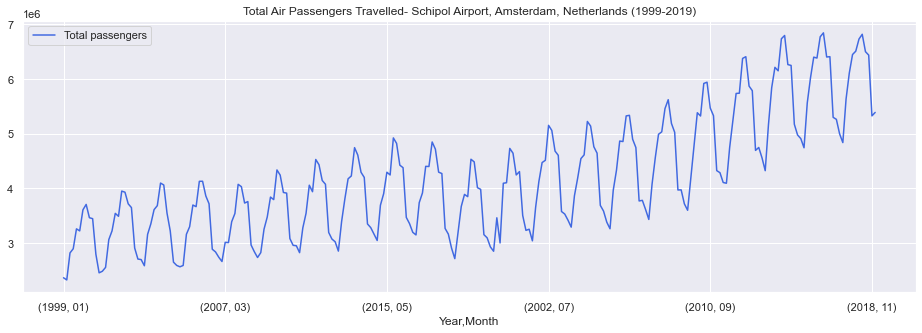

In [304]:
amsterdam= read_csv('../Data/aviation_statistics_amsterdam.csv', 
                    sep= ';').drop(axis= 0, index= [0])
rows_to_drop= [val for val in range(253, 269)]
amsterdam= amsterdam.drop(axis= 0, index= rows_to_drop)
amsterdam.columns= ["Airport", "Time", "Cross-country flights", "Local flights", "Total flights",
                   "Scheduled flights", "Total passengers", "Total cargo",
                   "Total mail"]

year= [year for year in range(1999,2020)]
month= ["01", "02", "03", "04",
        "05", "06", "07", "08", "09", 
        "10", "11", "12"]
amsterdam['Year']= year* 12
amsterdam['Month']= month* 21
amsterdam['Total passengers']= [int(str(count).replace(',', '')) for count in amsterdam['Total passengers']]
amsterdam= amsterdam.set_index(["Year", "Month"])[['Total passengers']]

amsterdam.plot.line(figsize= (16, 5), color= "royalblue")
plt.title('Total Air Passengers Travelled- Schipol Airport, Amsterdam, Netherlands (1999-2019)')

Text(0.5, 1.0, 'Total Air Passengers Travelled- Schipol Airport, Amsterdam, Netherlands (1999-2020)')

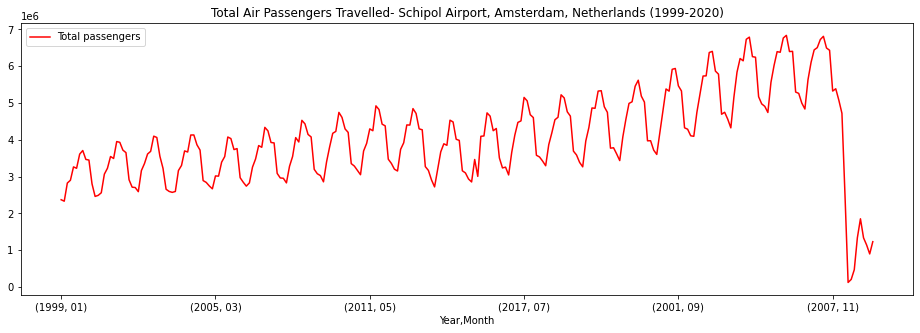

In [150]:
amsterdam= read_csv('../Data/aviation_statistics_amsterdam.csv', 
                    sep= ';').drop(axis= 0, index= [0])
rows_to_drop= [val for val in range(265, 269)]
amsterdam= amsterdam.drop(axis= 0, index= rows_to_drop)
amsterdam.columns= ["Airport", "Time", "Cross-country flights", "Local flights", "Total flights",
                   "Scheduled flights", "Total passengers", "Total cargo",
                   "Total mail"]

year= [year for year in range(1999,2021)]
month= ["01", "02", "03", "04",
        "05", "06", "07", "08", "09", 
        "10", "11", "12"]
amsterdam['Year']= year* len(month)
amsterdam['Month']= month* len(year)
amsterdam['Total passengers']= [int(str(count).replace(',', '')) for count in amsterdam['Total passengers']]
amsterdam= amsterdam.set_index(["Year", "Month"])[['Total passengers']]

amsterdam.plot.line(figsize= (16, 5), color= "red")
plt.title('Total Air Passengers Travelled- Schipol Airport, Amsterdam, Netherlands (1999-2020)')

Text(0.5, 1.0, 'Fastenal Sales Data (2004-2013)')

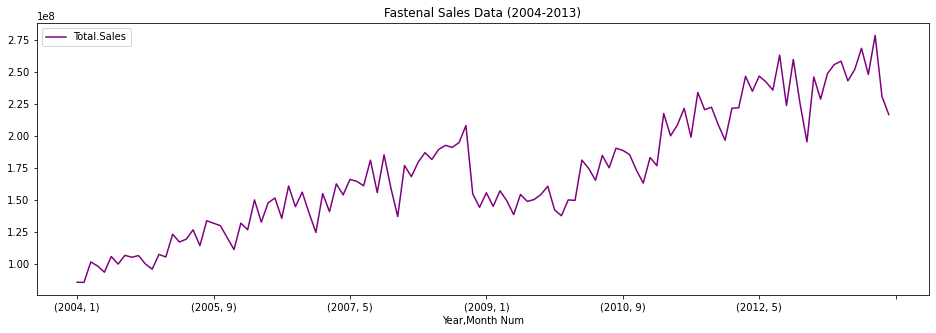

In [186]:
fastenal= read_csv('http://course1.winona.edu/bdeppa/FIN%20335/Datasets/Fastenal%20Sales%20(2004-2013).csv', 
                   index_col= ["Year", "Month Num"])
fastenal[['Total.Sales']].plot.line(figsize= (16, 5), color= "purple")
plt.title('Fastenal Sales Data (2004-2013)')

Text(0.5, 1.0, 'Total Sunspots Observed- Royal Observatory of Belgium, Brussels (2000-2013)')

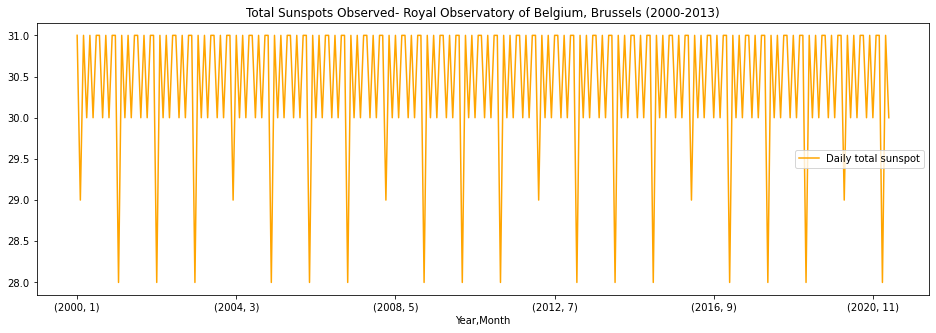

In [218]:
sunspots= read_csv('../Data/daily_sunspot_count.csv', sep= ';')
sunspots.columns= ["Date", "Year", "Month", "Day", "Fractional date",
                  "Daily total sunspot", "Daily standard deviation",
                  "Number of observations", "Definitive or Provisional value",
                  "Year_Month"]
sunspots= sunspots.groupby(["Year", "Month"]).count()[["Daily total sunspot"]]
sunspots.loc[2000:].plot.line(figsize= (16, 5), color= "orange")
plt.title('Total Sunspots Observed- Royal Observatory of Belgium, Brussels (2000-2013)')

Text(0.5, 1.0, 'Gaussian White Noise- Mean= 0 and Standard Deviation= 1')

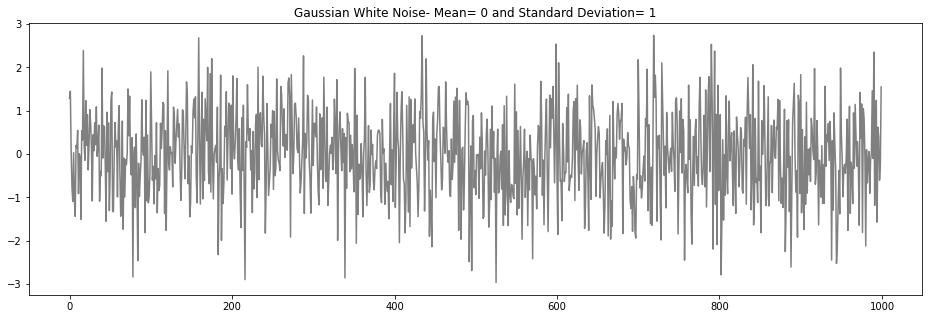

In [227]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
seed(1)
series = [gauss(0.0, 1.0) for i in range(1000)]
series = Series(series)
series.plot.line(figsize= (16, 5), color= "grey")
plt.title('Gaussian White Noise- Mean= 0 and Standard Deviation= 1')

<AxesSubplot:ylabel='Density'>

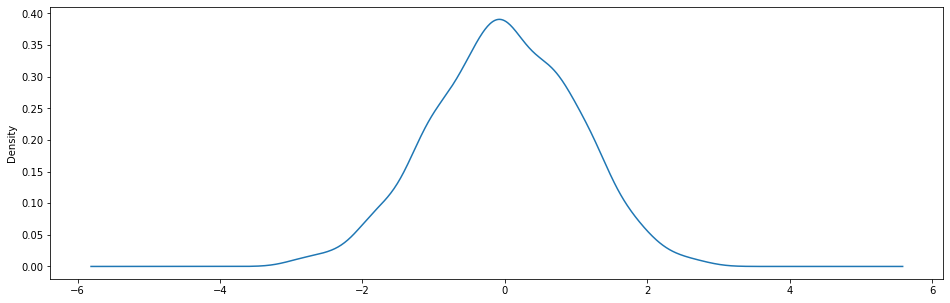

In [235]:
series.plot.density(figsize= (16, 5))

## Decomposing Time Series

In [363]:
%matplotlib inline
import seaborn; seaborn.set()
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime
from pandas import to_datetime

In [364]:
amsterdam= read_csv('../Data/aviation_statistics_amsterdam.csv', 
                    sep= ';').drop(axis= 0, index= [0])
rows_to_drop= [val for val in range(253, 269)]
amsterdam= amsterdam.drop(axis= 0, index= rows_to_drop)
amsterdam.columns= ["Airport", "Time", "Cross-country flights", "Local flights", "Total flights",
                   "Scheduled flights", "Total passengers", "Total cargo",
                   "Total mail"]
amsterdam['Month']= [month for month in range(1, 13)]*int(amsterdam.shape[0]/12)
amsterdam['Year']= [val[:4] for val in amsterdam['Time']]
amsterdam['TimeIndex']= to_datetime([str(row['Year'])+ '/'+ str(row['Month']) for item, row in amsterdam.iterrows()])
amsterdam['Total passengers']= [int(str(count).replace(',', '')) for count in amsterdam['Total passengers']]
amsterdam= amsterdam.set_index('TimeIndex')

result= seasonal_decompose(amsterdam['Total passengers'], period= 12)

Text(0.5, 1.0, 'Total Air Passengers Travelled- Schipol Airport, Amsterdam, Netherlands (1999-2020)')

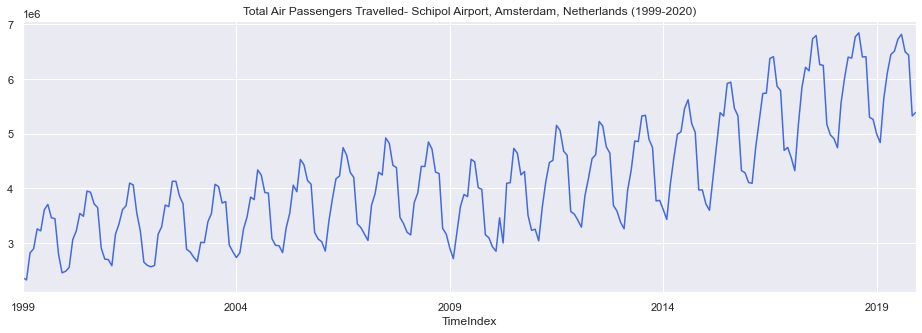

In [359]:
result.observed.plot(figsize= (16, 5), color= "royalblue")
plt.title('Total Air Passengers Travelled- Schipol Airport, Amsterdam, Netherlands (1999-2020)')

Text(0.5, 1.0, 'Decomposed Trend')

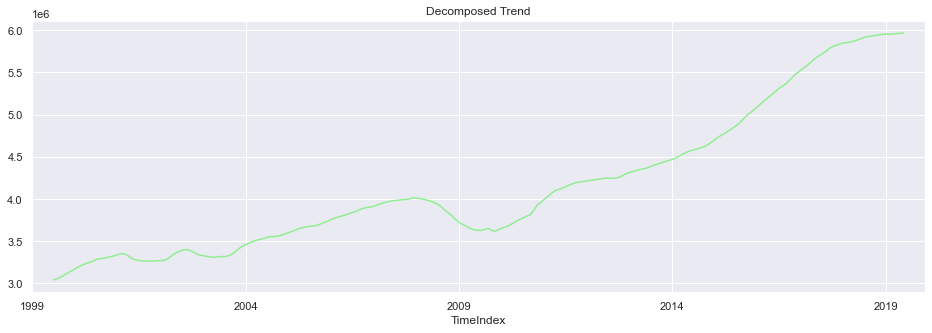

In [381]:
result.trend.plot(figsize= (16, 5), color= "lightgreen")
plt.title('Decomposed Trend')

Text(0.5, 1.0, 'Decomposed Seasonality')

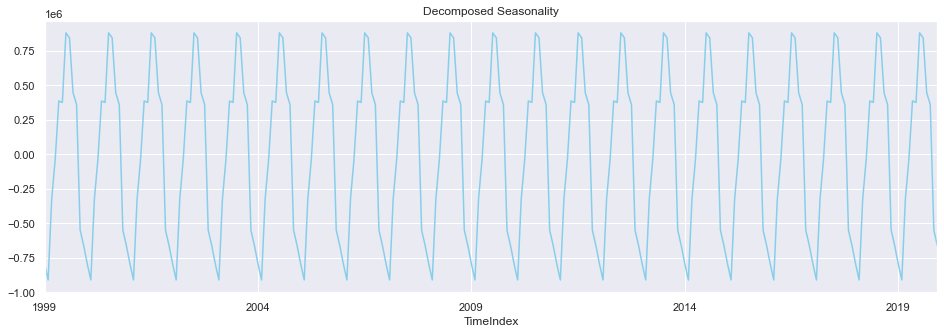

In [380]:
result.seasonal.plot(figsize= (16, 5), color= "skyblue")
plt.title('Decomposed Seasonality')

Text(0.5, 1.0, 'Decomposed Residuals')

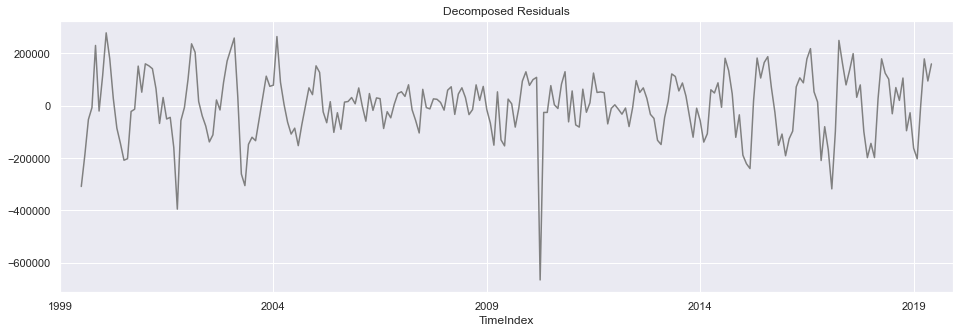

In [382]:
result.resid.plot(figsize= (16, 5), color= "grey")
plt.title('Decomposed Residuals')

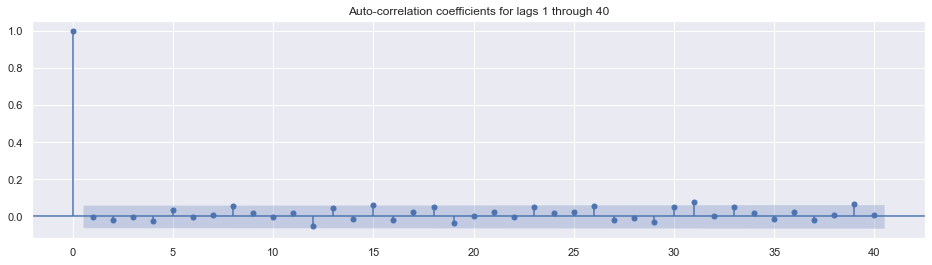

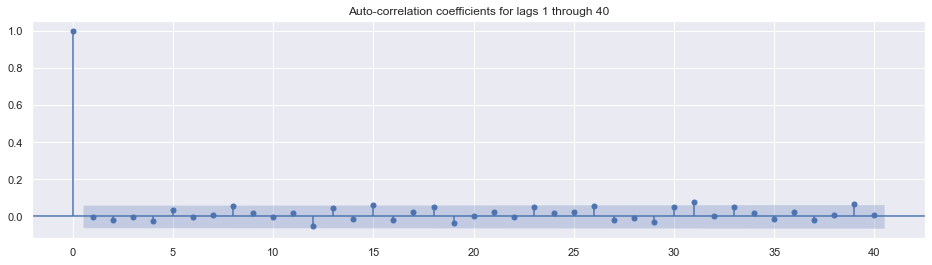

In [395]:
plt.rcParams['figure.figsize'] = (16, 4)
import statsmodels.graphics.tsaplots as tsa
tsa.plot_acf(series, lags=40, alpha=0.05, 
             title='Auto-correlation coefficients for lags 1 through 40')

### Detecting Residual Autocorrelation: Ljung-Box Test
Ljung-Box test of autocorrelation in residuals

In [400]:
import statsmodels.stats.diagnostic as diag
diag.acorr_ljungbox(series, lags=[40], boxpierce=True, period=None, return_df=False)

(array([46.6024698]),
 array([0.21925043]),
 array([45.43839709]),
 array([0.25581875]))

In [399]:
?diag.acorr_ljungbox

In [409]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

In [407]:

def stationarity_check(ts):
    # Determing rolling statistics
    roll_mean = ts.rolling(12).mean()
    # Plot rolling statistics:
    plt.plot(ts, color='green',label='Original')
    plt.plot(roll_mean, color='blue', label='Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show(block=False)
    # Perform Augmented Dickey-Fuller test:
    print('Augmented Dickey-Fuller test:')
    df_test = adfuller(ts)
    df_output = Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    print("df_output: \n",df_output)
    for key,value in df_test[4].items():
        df_output['Critical Value (%s)'%key] = value
    print(df_output)

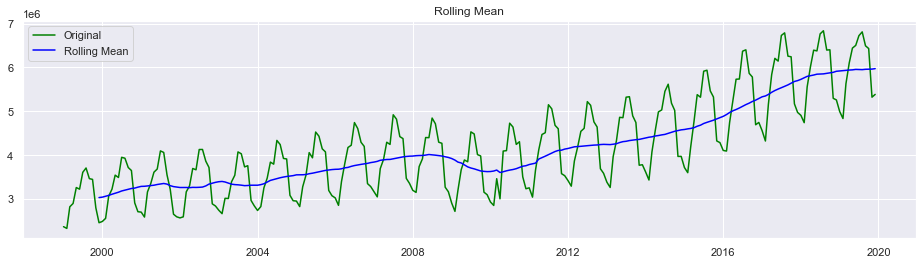

Augmented Dickey-Fuller test:
df_output: 
 Test Statistic                   0.513128
p-value                          0.985267
#Lags Used                      14.000000
Number of Observations Used    237.000000
dtype: float64
Test Statistic                   0.513128
p-value                          0.985267
#Lags Used                      14.000000
Number of Observations Used    237.000000
Critical Value (1%)             -3.458247
Critical Value (5%)             -2.873814
Critical Value (10%)            -2.573311
dtype: float64


In [408]:
stationarity_check(amsterdam['Total passengers'])

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


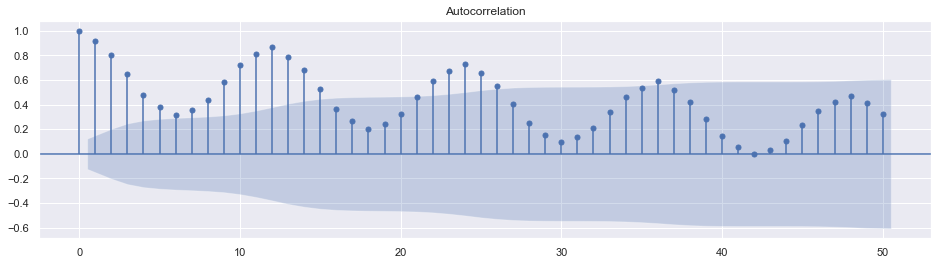

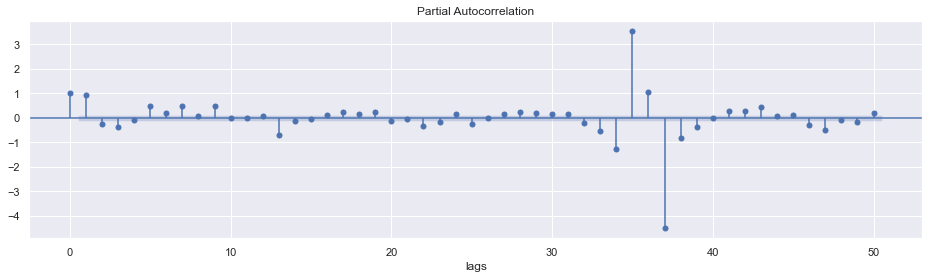

In [410]:

plot_acf(amsterdam['Total passengers'], lags=50)
plot_pacf(amsterdam['Total passengers'], lags=50)
plt.xlabel('lags')
plt.show()

## Modelling: Autoregressive Integrated Moving Average (ARIMA)

Let us begin with creating a first ARIMA model. Howver, for the sake of simplicity, let us refrain ourselves to only using fixed parameter values for AR(p= 1) and MA(q= 1). This approach would allow us to play with the `differencing` parameter of the ARIMA and eventually, we will master the skill of carefully choosing the correct value of how many times we need to do the `differencing`.

In [1038]:
df= read_csv('../Data/world_population.csv')
df.head(10)
india= df[df['Location']== 'India'][['Time', 'PopTotal']].set_index('Time')
india= india.iloc[:70]

In [1039]:
adf_india= adfuller(india)
print("ADF statistic:", adf_india[0])
print("p-value:", adf_india[1])

ADF statistic: -0.585769424308767
p-value: 0.8741652410514149


In [1040]:
adf_india= adfuller(india.diff().diff().diff().diff().dropna())
print("ADF statistic:", adf_india[0])
print("p-value:", adf_india[1])

ADF statistic: -4.497431475205055
p-value: 0.0001987520044365181


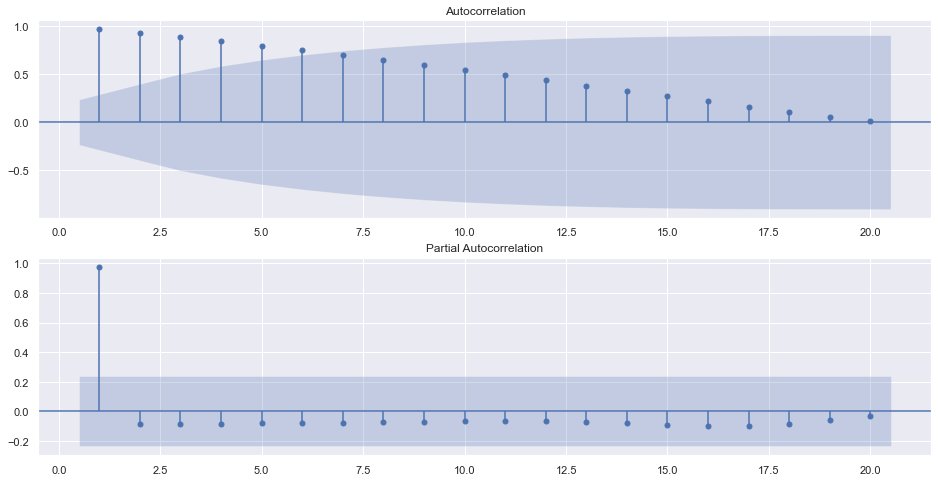

In [1041]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,8))
plot_acf(india.diff().dropna(), lags=20, zero=False, ax=ax1)
plot_pacf(india.diff().dropna(), lags=20, zero=False, ax=ax2)
plt.show()

In [1046]:
%%capture
from statsmodels.tsa.arima.model import ARIMA
model= ARIMA(india, order= (1,4,1))
results= model.fit()
mean_forecast= results.get_forecast(steps= 10).predicted_mean
confidence_intervals= results.get_forecast(steps= 10).conf_int()
lower_limits = confidence_intervals.loc[:,'lower PopTotal']
upper_limits = confidence_intervals.loc[:,'upper PopTotal']

Text(0.5, 1.0, 'Population Growth- India (1950-2019)')

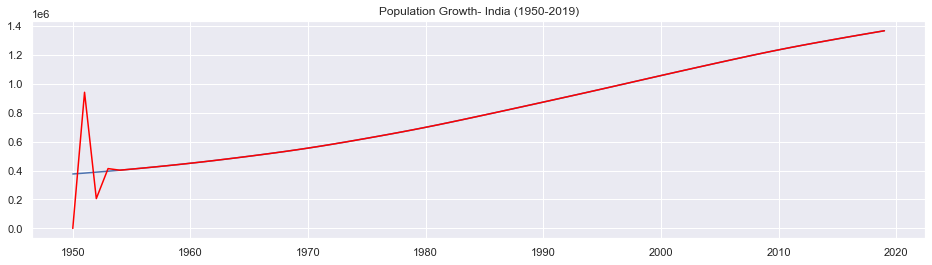

In [1043]:
plt.rcParams['figure.figsize'] = (16, 4)
plt.plot(india)
plt.plot(results.fittedvalues, color='red')
plt.title('Population Growth- India (1950-2019)')

<Figure size 1152x288 with 0 Axes>

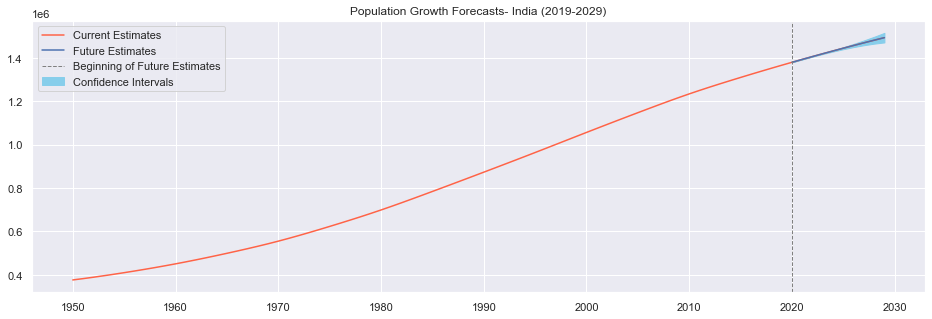

In [1044]:
plt.figure()

forecasts= DataFrame(
    {"index": [val for val in range(2020, 2030)],
     "PopTotal": mean_forecast}).set_index("index")
india= india.append(forecasts)
india.plot.line(figsize= (16, 5), color= "tomato")
plt.title('Population Growth Forecasts- India (2019-2029)')
plt.plot(DataFrame({'index': [val for val in range(2020, 2030)], 
                   'PopTotal': mean_forecast}).set_index("index"))
plt.fill_between(x=DataFrame({'Time': [val for val in range(2020, 2030)], 
                   'PopTotal': mean_forecast}).set_index("Time").index, 
                 y1= lower_limits, y2= upper_limits,
                color= 'skyblue')
plt.axvline(x=2020, color= 'grey', linewidth= 1, linestyle= '--')
plt.legend(["Current Estimates","Future Estimates",
            "Beginning of Future Estimates", "Confidence Intervals"])

In [1047]:
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:               PopTotal   No. Observations:                   80
Model:                 ARIMA(1, 4, 1)   Log Likelihood                -366.490
Date:                Thu, 13 May 2021   AIC                            738.980
Time:                        11:38:59   BIC                            745.973
Sample:                             0   HQIC                           741.775
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1762      0.219      0.806      0.420      -0.252       0.605
ma.L1          0.1791      0.247      0.725      0.468      -0.305       0.663
sigma2       662.8257    107.252      6.180      0.0

### Creating Custom Functions
Let us create two functions which are aimed at computing the model output when receiving model parameters and plotting the graph of forecasts based on the output of model.

In [686]:
def compute_arima_model(data, model_parameters, steps):
    model= ARIMA(data, order= model_parameters)
    results= model.fit()
    mean_forecast= results.get_forecast(steps= steps).predicted_mean
    confidence_intervals= results.get_forecast(steps= steps).conf_int()
    lower_limits = confidence_intervals.loc[:, confidence_intervals.columns[0]]
    upper_limits = confidence_intervals.loc[:, confidence_intervals.columns[1]]
    return({
        "mean_forecast": mean_forecast.values,
        "upper_limits": upper_limits.values,
        "lower_limits": lower_limits.values,
        "steps": steps
    })

In [687]:
def plot_arima_forecasts(data, prediction_start, model_outcomes, plot_title):
    
    prediction_end= prediction_start+ model_outcomes["steps"]
    forecasts= DataFrame(
        {'index': [val for val in range(prediction_start, prediction_end)],
         str(data.columns[0]): model_outcomes["mean_forecast"]}).set_index("index")
    data= data.append(forecasts)
    plt.figure()
    data.plot.line(figsize= (16, 5), color= "tomato")
    plt.title(plot_title)
    plt.plot(forecasts)
    plt.fill_between(x=DataFrame({'Time': [val for val in range(prediction_start, prediction_end)], 
                       str(data.columns[0]): model_outcomes["mean_forecast"]}).set_index("Time").index, 
                     y1= model_outcomes["lower_limits"], y2= model_outcomes["upper_limits"],
                    color= 'skyblue')
    plt.axvline(x=prediction_start, color= 'grey', linewidth= 1, linestyle= '--')
    plt.legend(["Current Estimates","Future Estimates",
                "Beginning of Future Estimates", "Confidence Intervals"])
    return()

In [698]:
%%capture
model_outcomes= compute_arima_model(india, (1,2,1), steps= 10)

()

<Figure size 1152x288 with 0 Axes>

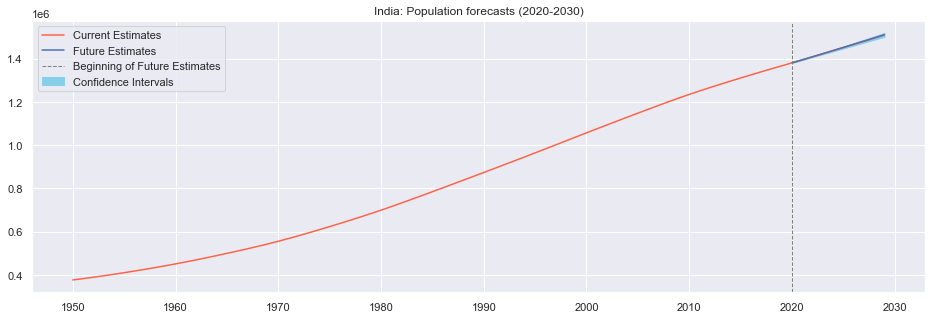

In [699]:
plot_arima_forecasts(india, 2020, model_outcomes, "India: Population forecasts (2020-2030)")

### Another Example

In [688]:
energy= read_csv('https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2020-consolidated-dataset-panel-format.csv')

In [689]:
canada= energy[energy['Country']== 'Canada']\
.set_index("Year")[['coalcons_ej']]

In [690]:
adf_canada= adfuller(canada.diff().diff().dropna())
print("ADF statistic:", adf_canada[0])
print("p-value:", adf_canada[1])

ADF statistic: -5.51958072046207
p-value: 1.8909194211998297e-06


In [691]:
%%capture
model_outcomes= compute_arima_model(canada, (1,2,1), steps= 10)

()

<Figure size 1152x288 with 0 Axes>

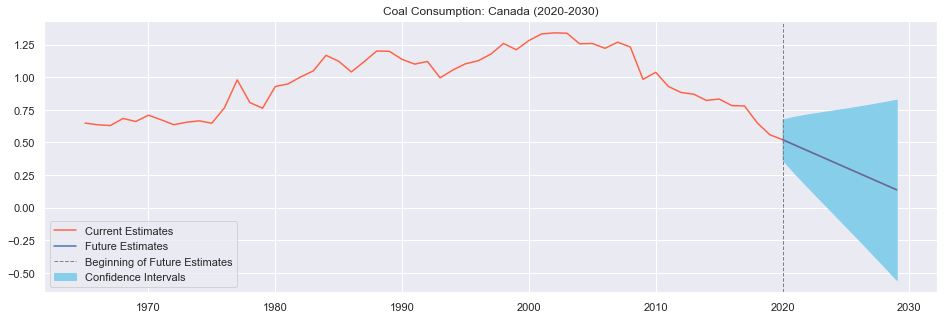

In [692]:
plot_arima_forecasts(canada, 2020, model_outcomes, "Coal Consumption: Canada (2020-2030)")

In [693]:
china= energy[energy['Country']== 'China']\
.set_index("Year")[['coalcons_ej']]

In [694]:
adf_china= adfuller(china.diff().dropna())
print("ADF statistic:", adf_china[0])
print("p-value:", adf_china[1])

ADF statistic: -3.387357711930269
p-value: 0.011397470694176551


In [695]:
%%capture
model_outcomes= compute_arima_model(china, (1,1,1), steps= 10)

()

<Figure size 1152x288 with 0 Axes>

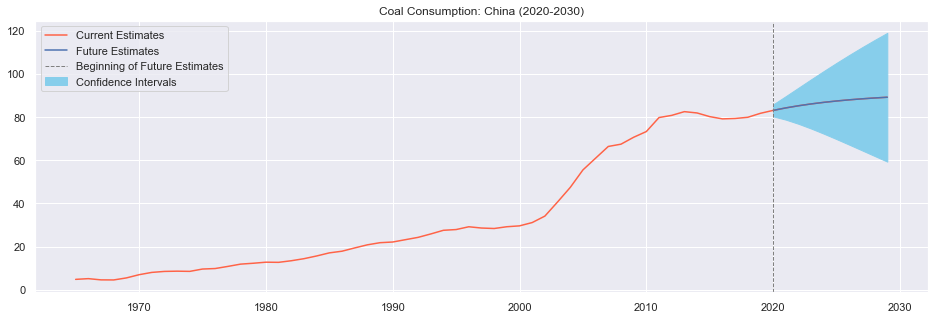

In [696]:
plot_arima_forecasts(china, 2020, model_outcomes, "Coal Consumption: China (2020-2030)")

## Seasonal Time Series

In [979]:

amsterdam= read_csv('../Data/aviation_statistics_amsterdam.csv', 
                    sep= ';').drop(axis= 0, index= [0])
rows_to_drop= [val for val in range(253, 269)]
amsterdam= amsterdam.drop(axis= 0, index= rows_to_drop)
amsterdam.columns= ["Airport", "Time", "Cross-country flights", "Local flights", "Total flights",
                   "Scheduled flights", "Total passengers", "Total cargo",
                   "Total mail"]
amsterdam['Month']= [month for month in range(1, 13)]*int(amsterdam.shape[0]/12)
amsterdam['Year']= [val[:4] for val in amsterdam['Time']]
amsterdam['TimeIndex']= to_datetime([str(row['Year'])+ '/'+ str(row['Month']) for item, row in amsterdam.iterrows()])
amsterdam['Total passengers']= [int(str(count).replace(',', '')) for count in amsterdam['Total passengers']]
amsterdam= amsterdam.set_index('TimeIndex')

Text(0.5, 1.0, 'Amsterdam Airport- Total Passenger Traffic')

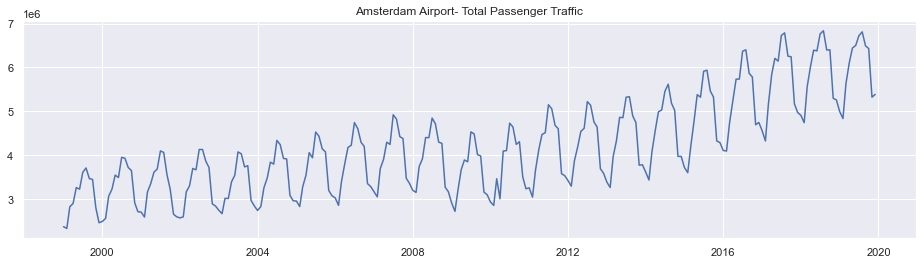

In [980]:
plt.figure(figsize=(16,4))
plt.plot(amsterdam['Total passengers'])
plt.title('Amsterdam Airport- Total Passenger Traffic')

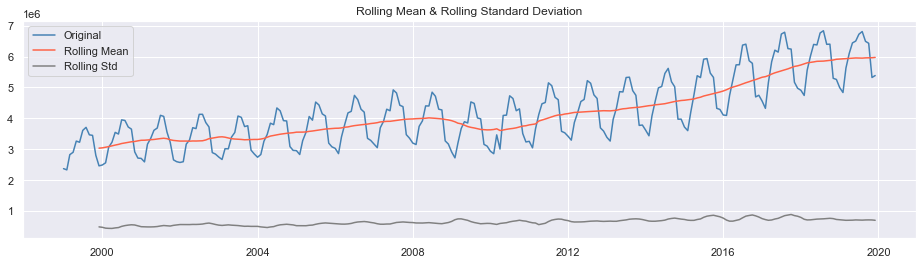

In [981]:
amsterdam_series= amsterdam[['Total passengers']]
rolling_mean = amsterdam_series.rolling(window = 12).mean()
rolling_std = amsterdam_series.rolling(window = 12).std()

plt.rcParams['figure.figsize'] = (16, 4)
plt.plot(amsterdam_series, color = 'steelblue', label = 'Original')
plt.plot(rolling_mean, color = 'tomato', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'grey', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

In [982]:
from statsmodels.tsa.stattools import adfuller

adf_amsterdam= adfuller(amsterdam_series)
print("ADF statistic:", adf_amsterdam[0])
print("p-value:", adf_amsterdam[1])

ADF statistic: 0.5131280512199616
p-value: 0.9852666979002384


### Detrending the Seasonal Time Series

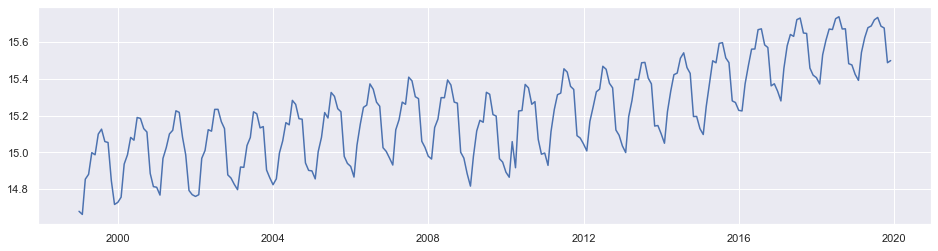

In [983]:
import numpy as np
df_log = np.log(amsterdam_series)
plt.plot(df_log)

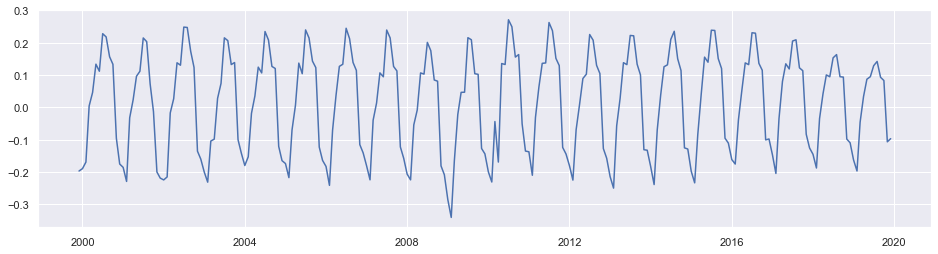

In [984]:
rolling_mean = df_log.rolling(window=12).mean()
df_log_minus_mean = df_log - rolling_mean
df_log_minus_mean.dropna(inplace=True)
plt.plot(df_log_minus_mean)

In [985]:
def get_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries["Total passengers"])
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

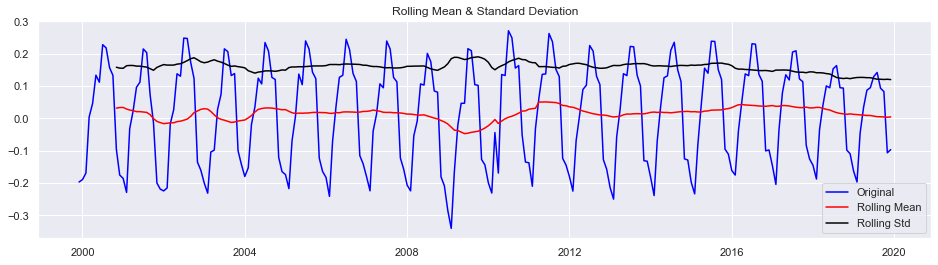

ADF Statistic: -3.676490531294938
p-value: 0.004456254415590106
Critical Values:
	1%: -3.4596204846395824
	5%: -2.8744153028455948
	10%: -2.5736320761218576


In [986]:
get_stationarity(df_log_minus_mean)

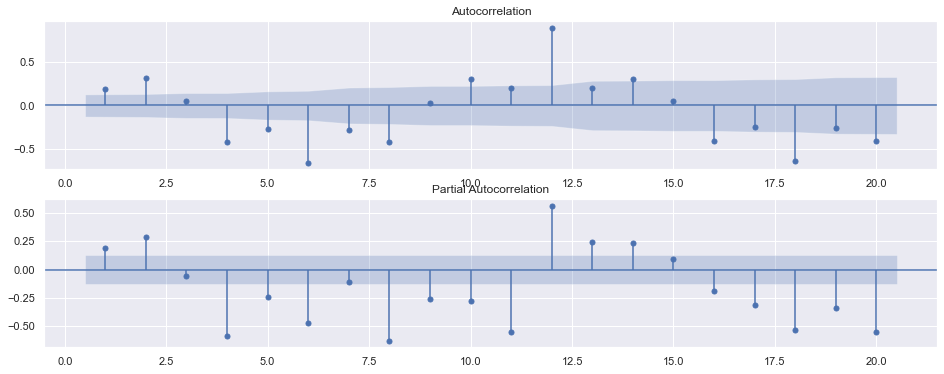

In [1037]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(16,6))
plot_acf(df_log_minus_mean.diff().dropna(), lags=20, zero=False, ax=ax1)
plot_pacf(df_log_minus_mean.diff().dropna(), lags=20, zero=False, ax=ax2)
plt.show()

/usr/local/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


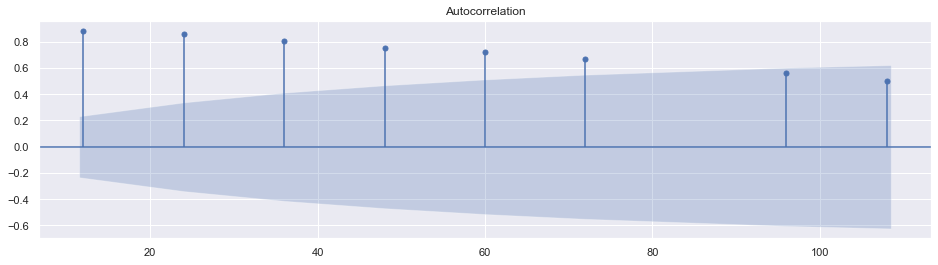

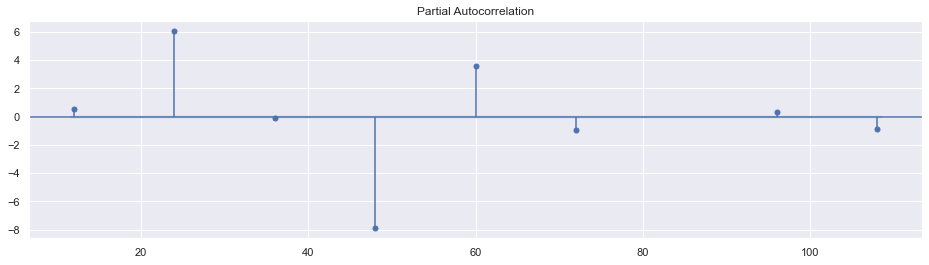

In [988]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig1= plot_acf(df_log_minus_mean.diff().dropna(), lags=[12,24,36,48,60,72, 96, 108], zero=False)
fig2= plot_pacf(df_log_minus_mean.diff().dropna(), lags=[12,24,36,48,60,72, 96, 108], zero=False)

In [995]:
%%capture
from statsmodels.tsa.statespace import ARIMA
model = ARIMA(amsterdam_series, order=(3,1,2))
results = model.fit()
mean_forecast= results.get_forecast(steps= 12).predicted_mean
confidence_intervals= results.get_forecast(steps= 12).conf_int()
lower_limits = confidence_intervals.loc[:,'lower Total passengers']
upper_limits = confidence_intervals.loc[:,'upper Total passengers']

Text(0.5, 1.0, 'Amsterdam Airport- Total Passenger Traffic')

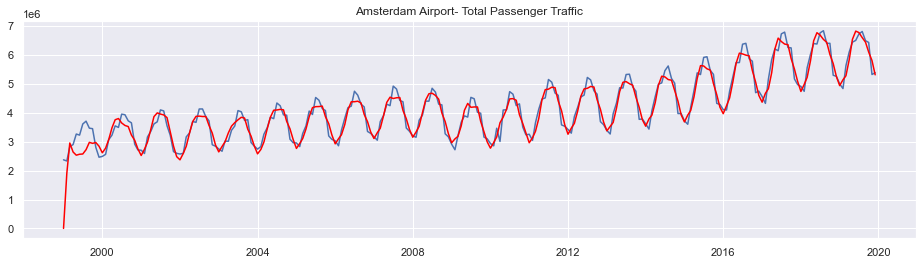

In [996]:
plt.rcParams['figure.figsize'] = (16, 4)
plt.plot(amsterdam_series)
plt.plot(results.fittedvalues, color='red')
plt.title('Amsterdam Airport- Total Passenger Traffic')

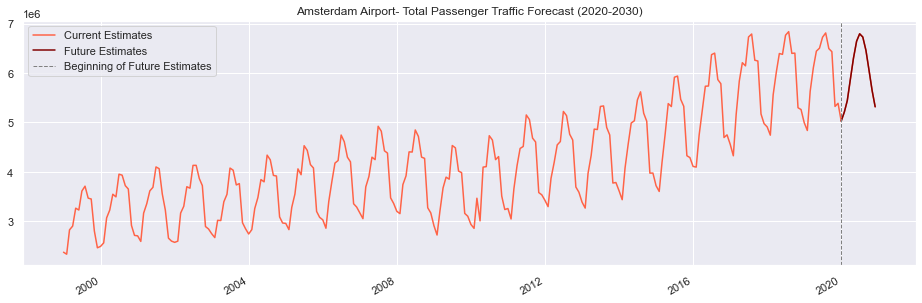

In [999]:
step= 12
period= 12
month= [month for month in range(1, 13)]* int(step/period)
year= 2020

forecasts= DataFrame(
    {"index": to_datetime([str(year)+ '-'+ str(val)+ '-01' for val in month]),
     "Total passengers": mean_forecast}).set_index("index")

amsterdam_series= amsterdam_series.append(forecasts)
amsterdam_series.plot.line(figsize= (16, 5), color= "tomato")
plt.title('Amsterdam Airport- Total Passenger Traffic Forecast (2020-2030)')
plt.plot(forecasts, color= "maroon")

plt.axvline(x=forecasts.index[0], color= 'grey', linewidth= 1, linestyle= '--')
plt.legend(["Current Estimates","Future Estimates",
            "Beginning of Future Estimates", "Confidence Intervals"])

In [1018]:
%%capture
from pandas import read_csv, read_stata, date_range, datetime, Series
from matplotlib import pyplot as plt
import requests
import numpy as np
from io import BytesIO
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [1019]:
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data = read_stata(BytesIO(air2))
data.index = date_range(start=datetime(data.time[0], 1, 1), periods=len(data), freq='MS')
data['lnair'] = np.log(data['air'])

# Fit the model
mod = SARIMAX(data['lnair'], order=(2,1,0), seasonal_order=(1,1,0,12), simple_differencing=True)
res = mod.fit(disp=False)
print(res.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       D.DS12.lnair   No. Observations:                  131
Model:             SARIMAX(2, 0, 0)x(1, 0, 0, 12)   Log Likelihood                 240.821
Date:                            Thu, 13 May 2021   AIC                           -473.643
Time:                                    10:44:56   BIC                           -462.142
Sample:                                02-01-1950   HQIC                          -468.970
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4057      0.080     -5.045      0.000      -0.563      -0.248
ar.L2         -0.0799      0.099   

## Prophet

In [1011]:
from prophet import Prophet


amsterdam_series= amsterdam['Total passengers'].reset_index()
amsterdam_series.columns= ['ds', 'y']

model = Prophet()
model.fit(amsterdam_series)
future = model.make_future_dataframe(periods=365)
future.tail()
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
612,2020-11-26,5.655592e+06,5.463326e+06,5.872437e+06
613,2020-11-27,5.688920e+06,5.482992e+06,5.905684e+06
614,2020-11-28,5.732296e+06,5.533681e+06,5.938876e+06
615,2020-11-29,5.785014e+06,5.572465e+06,5.999717e+06
616,2020-11-30,5.846084e+06,5.624982e+06,6.040118e+06


Text(0.5, 1.0, 'Amsterdam Airport- Total Passenger Traffic Forecast: Prophet (2019-2029)')

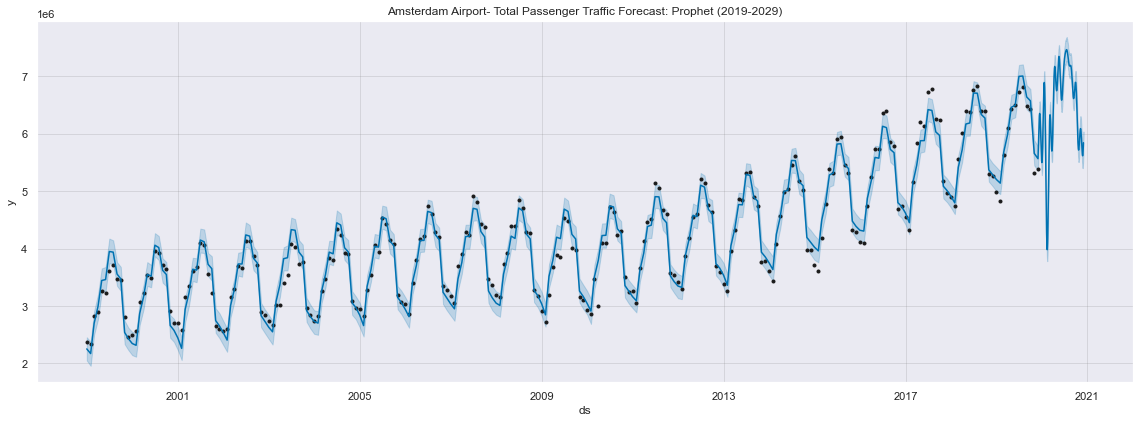

In [1009]:
fig1= m.plot(forecast, figsize= (16, 6))
plt.title("Amsterdam Airport- Total Passenger Traffic Forecast: Prophet (2019-2029)")

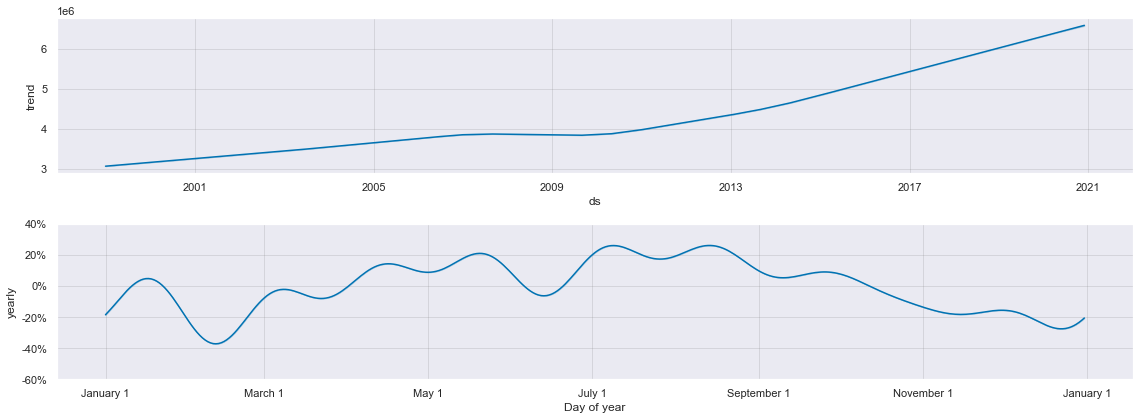

In [1014]:
fig1 = model.plot_components(forecast, figsize= (16, 6))

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


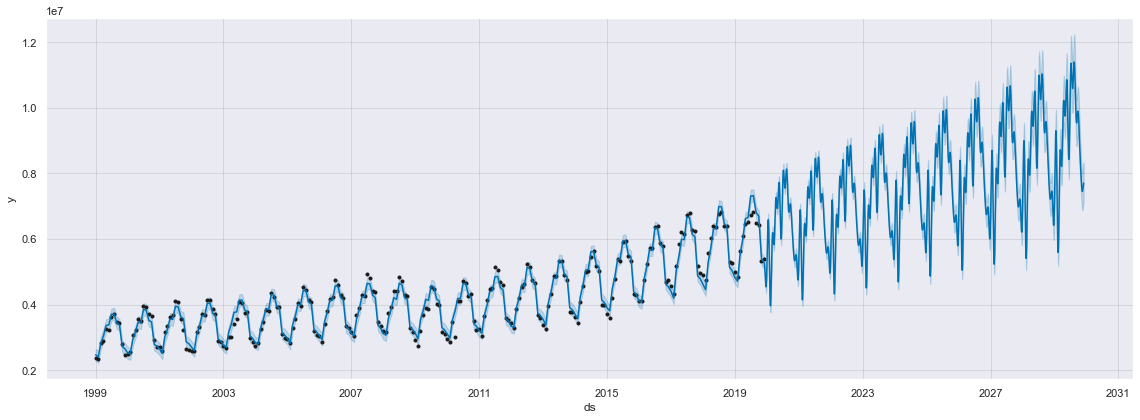

In [1012]:
model = Prophet(seasonality_mode='multiplicative').fit(df)
future = model.make_future_dataframe(periods=3652)
fcst = model.predict(future)
fig = model.plot(fcst, figsize= (16, 6))